# Analysis of loss distributions

One of the most important factors underlying this work is the question of *how loss distributions really behave* in machine learning applications. This notebook contains experiments designed to shed some light on this.

In [1]:
## External modules.
from matplotlib.pyplot import savefig, subplots, show, tight_layout
import numpy as np
from os import path

## Internal modules.
from setup_data import get_data
from setup_losses import get_loss
from setup_models import get_model
from setup_results import img_dir, results_dir, my_fontsize, my_ext, export_legend

In [2]:
## Specify the model type to be used.
model_name = "linreg_multi"

In [3]:
## Specify the base loss and risk to be used.
loss_name = "logistic"
risk_name = "erm"

In [4]:
## Datasets stored locally that we want to examine.
datasets = ["adult", "australian", "cifar10", "cod_rna",
            "covtype", "emnist_balanced", "fashion_mnist",
            "iris", "mnist", "protein"]

In [5]:
## Prep a random generator object.
entropy = 21281555010861417500927421083615113141
rg = np.random.default_rng(seed=np.random.SeedSequence(entropy=entropy)) # Use this for a pre-fixed seed.
#rg = np.random.default_rng() # Use this for a randomized seed.

/home/mjh/Dropbox/2_research/code/dev/mml-dev/mml/data/adult/adult.h5 (File) 'adult: Full dataset'
Last modif.: 'Wed Mar  3 16:01:37 2021'
Object Tree: 
/ (RootGroup) 'adult: Full dataset'
/X (Array(45222, 105)) 'adult: Features'
/y (Array(45222, 1)) 'adult: Labels'

Type: X (<class 'numpy.ndarray'>)
Type: y (<class 'numpy.ndarray'>)
--Shapes--
n_all: 45222 num_features: 105 num_labels: 1
--Subset sizes--
n_train: 36177 n_val: 4522 n_test: 4523
Data types:
X_train: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'> y_val: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'> y_test: <class 'numpy.ndarray'>
Shape of parameter 'w': (105, 2)


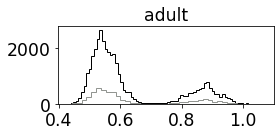

/home/mjh/Dropbox/2_research/code/dev/mml-dev/mml/data/australian/australian.h5 (File) 'australian: Full dataset'
Last modif.: 'Thu Nov 18 09:44:35 2021'
Object Tree: 
/ (RootGroup) 'australian: Full dataset'
/X (Array(690, 43)) 'australian: Features'
/y (Array(690, 1)) 'australian: Labels'

Type: X (<class 'numpy.ndarray'>)
Type: y (<class 'numpy.ndarray'>)
--Shapes--
n_all: 690 num_features: 43 num_labels: 1
--Subset sizes--
n_train: 552 n_val: 69 n_test: 69
Data types:
X_train: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'> y_val: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'> y_test: <class 'numpy.ndarray'>
Shape of parameter 'w': (43, 2)


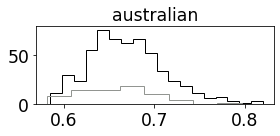

/home/mjh/Dropbox/2_research/code/dev/mml-dev/mml/data/cifar10/cifar10.h5 (File) 'cifar10: Full dataset'
Last modif.: 'Wed Mar  3 16:08:33 2021'
Object Tree: 
/ (RootGroup) 'cifar10: Full dataset'
/X (Array(60000, 3072)) 'cifar10: Features'
/y (Array(60000, 1)) 'cifar10: Labels'

Type: X (<class 'numpy.ndarray'>)
Type: y (<class 'numpy.ndarray'>)
--Shapes--
n_all: 60000 num_features: 3072 num_labels: 1
--Subset sizes--
n_train: 48000 n_val: 6000 n_test: 6000
Data types:
X_train: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'> y_val: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'> y_test: <class 'numpy.ndarray'>
Shape of parameter 'w': (3072, 10)


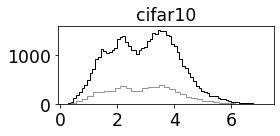

/home/mjh/Dropbox/2_research/code/dev/mml-dev/mml/data/cod_rna/cod_rna.h5 (File) 'cod_rna: Full dataset'
Last modif.: 'Fri Mar 12 13:43:57 2021'
Object Tree: 
/ (RootGroup) 'cod_rna: Full dataset'
/X (Array(331152, 8)) 'cod_rna: Features'
/y (Array(331152, 1)) 'cod_rna: Labels'

Type: X (<class 'numpy.ndarray'>)
Type: y (<class 'numpy.ndarray'>)
--Shapes--
n_all: 331152 num_features: 8 num_labels: 1
--Subset sizes--
n_train: 264921 n_val: 33115 n_test: 33116
Data types:
X_train: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'> y_val: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'> y_test: <class 'numpy.ndarray'>
Shape of parameter 'w': (8, 2)


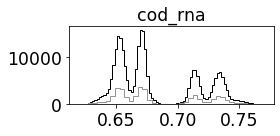

/home/mjh/Dropbox/2_research/code/dev/mml-dev/mml/data/covtype/covtype.h5 (File) 'covtype: Full dataset'
Last modif.: 'Wed Mar  3 16:08:50 2021'
Object Tree: 
/ (RootGroup) 'covtype: Full dataset'
/X (Array(581012, 54)) 'covtype: Features'
/y (Array(581012, 1)) 'covtype: Labels'

Type: X (<class 'numpy.ndarray'>)
Type: y (<class 'numpy.ndarray'>)
--Shapes--
n_all: 581012 num_features: 54 num_labels: 1
--Subset sizes--
n_train: 464809 n_val: 58101 n_test: 58102
Data types:
X_train: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'> y_val: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'> y_test: <class 'numpy.ndarray'>
Shape of parameter 'w': (54, 7)


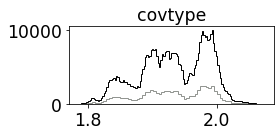

/home/mjh/Dropbox/2_research/code/dev/mml-dev/mml/data/emnist_balanced/emnist_balanced.h5 (File) 'emnist_balanced: Full dataset'
Last modif.: 'Thu Nov 11 15:48:45 2021'
Object Tree: 
/ (RootGroup) 'emnist_balanced: Full dataset'
/X (Array(131600, 784)) 'emnist_balanced: Features'
/y (Array(131600, 1)) 'emnist_balanced: Labels'

Type: X (<class 'numpy.ndarray'>)
Type: y (<class 'numpy.ndarray'>)
--Shapes--
n_all: 131600 num_features: 784 num_labels: 1
--Subset sizes--
n_train: 105280 n_val: 13160 n_test: 13160
Data types:
X_train: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'> y_val: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'> y_test: <class 'numpy.ndarray'>
Shape of parameter 'w': (784, 47)


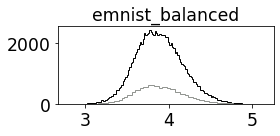

/home/mjh/Dropbox/2_research/code/dev/mml-dev/mml/data/fashion_mnist/fashion_mnist.h5 (File) 'fashion_mnist: Full dataset'
Last modif.: 'Wed Jan  5 17:47:44 2022'
Object Tree: 
/ (RootGroup) 'fashion_mnist: Full dataset'
/X (Array(70000, 784)) 'fashion_mnist: Features'
/y (Array(70000, 1)) 'fashion_mnist: Labels'

Type: X (<class 'numpy.ndarray'>)
Type: y (<class 'numpy.ndarray'>)
--Shapes--
n_all: 70000 num_features: 784 num_labels: 1
--Subset sizes--
n_train: 56000 n_val: 7000 n_test: 7000
Data types:
X_train: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'> y_val: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'> y_test: <class 'numpy.ndarray'>
Shape of parameter 'w': (784, 10)


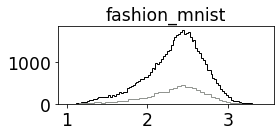

/home/mjh/Dropbox/2_research/code/dev/mml-dev/mml/data/iris/iris.h5 (File) 'iris: Full dataset'
Last modif.: 'Fri Mar 12 16:51:56 2021'
Object Tree: 
/ (RootGroup) 'iris: Full dataset'
/X (Array(150, 4)) 'iris: Features'
/y (Array(150, 1)) 'iris: Labels'

Type: X (<class 'numpy.ndarray'>)
Type: y (<class 'numpy.ndarray'>)
--Shapes--
n_all: 150 num_features: 4 num_labels: 1
--Subset sizes--
n_train: 120 n_val: 15 n_test: 15
Data types:
X_train: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'> y_val: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'> y_test: <class 'numpy.ndarray'>
Shape of parameter 'w': (4, 3)


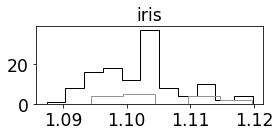

/home/mjh/Dropbox/2_research/code/dev/mml-dev/mml/data/mnist/mnist.h5 (File) 'mnist: Full dataset'
Last modif.: 'Fri Mar 12 18:37:03 2021'
Object Tree: 
/ (RootGroup) 'mnist: Full dataset'
/X (Array(70000, 784)) 'mnist: Features'
/y (Array(70000, 1)) 'mnist: Labels'

Type: X (<class 'numpy.ndarray'>)
Type: y (<class 'numpy.ndarray'>)
--Shapes--
n_all: 70000 num_features: 784 num_labels: 1
--Subset sizes--
n_train: 56000 n_val: 7000 n_test: 7000
Data types:
X_train: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'> y_val: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'> y_test: <class 'numpy.ndarray'>
Shape of parameter 'w': (784, 10)


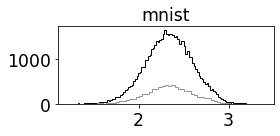

/home/mjh/Dropbox/2_research/code/dev/mml-dev/mml/data/protein/protein.h5 (File) 'protein: Full dataset'
Last modif.: 'Wed Jan  5 17:50:13 2022'
Object Tree: 
/ (RootGroup) 'protein: Full dataset'
/X (Array(145751, 74)) 'protein: Features'
/y (Array(145751, 1)) 'protein: Labels'

Type: X (<class 'numpy.ndarray'>)
Type: y (<class 'numpy.ndarray'>)
--Shapes--
n_all: 145751 num_features: 74 num_labels: 1
--Subset sizes--
n_train: 116600 n_val: 14575 n_test: 14576
Data types:
X_train: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'> y_val: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'> y_test: <class 'numpy.ndarray'>
Shape of parameter 'w': (74, 2)


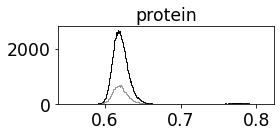

In [6]:
for dataset in datasets:
    
    ## Load up a dataset.
    (X_train, y_train, X_val, y_val, X_test, y_test, ds_paras) = get_data(dataset=dataset, rg=rg)
    
    ## Get the base loss object.
    loss_kwargs = {"risk_name": risk_name}
    loss_base, loss = get_loss(name=loss_name, **loss_kwargs)
    
    ## Initialize a linear model.
    model = get_model(name=model_name, paras_init=None, rg=rg, **ds_paras, **loss_kwargs)
    print("Shape of parameter 'w':", model.paras["w"].shape)
    
    ## Compute base losses.
    losses_tr = loss_base(model=model, X=X_train, y=y_train)
    losses_te = loss_base(model=model, X=X_test, y=y_test)
    
    ## Plot loss distributions using a histogram.
    fig, ax = subplots(1, 1, figsize=(4,2))
    ax.hist(losses_tr, bins="auto", color="xkcd:black", fill=False, histtype="step",
            hatch=None, orientation="vertical", density=False)
    ax.hist(losses_te, bins="auto", color="xkcd:gray", fill=False, histtype="step",
            hatch=None, orientation="vertical", density=False)
    ax.tick_params(labelsize=my_fontsize)
    ax.set_title("{}".format(dataset), size=my_fontsize)
    fname = path.join(img_dir, "lossdist_init_{}_{}.{}".format(loss_name, dataset, my_ext))
    tight_layout()
    savefig(fname=fname)
    show()

___